INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7e5dxc3t/ml9dih4l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7e5dxc3t/kyl0lzgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72255', 'data', 'file=/tmp/tmp7e5dxc3t/ml9dih4l.json', 'init=/tmp/tmp7e5dxc3t/kyl0lzgw.json', 'output', 'file=/tmp/tmp7e5dxc3t/prophet_modeldpnfi_hc/prophet_model-20250421130714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:07:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:07:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


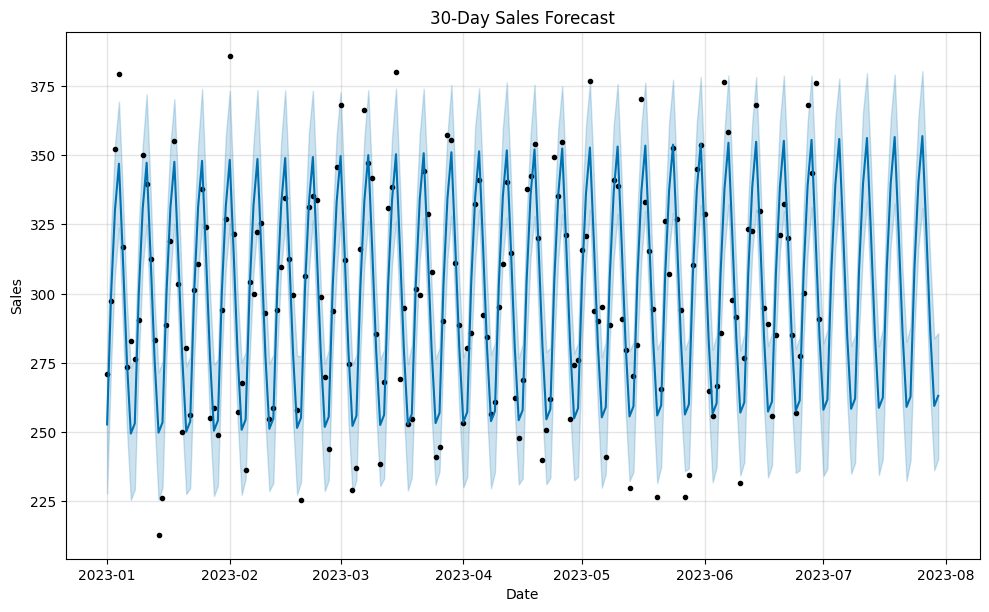

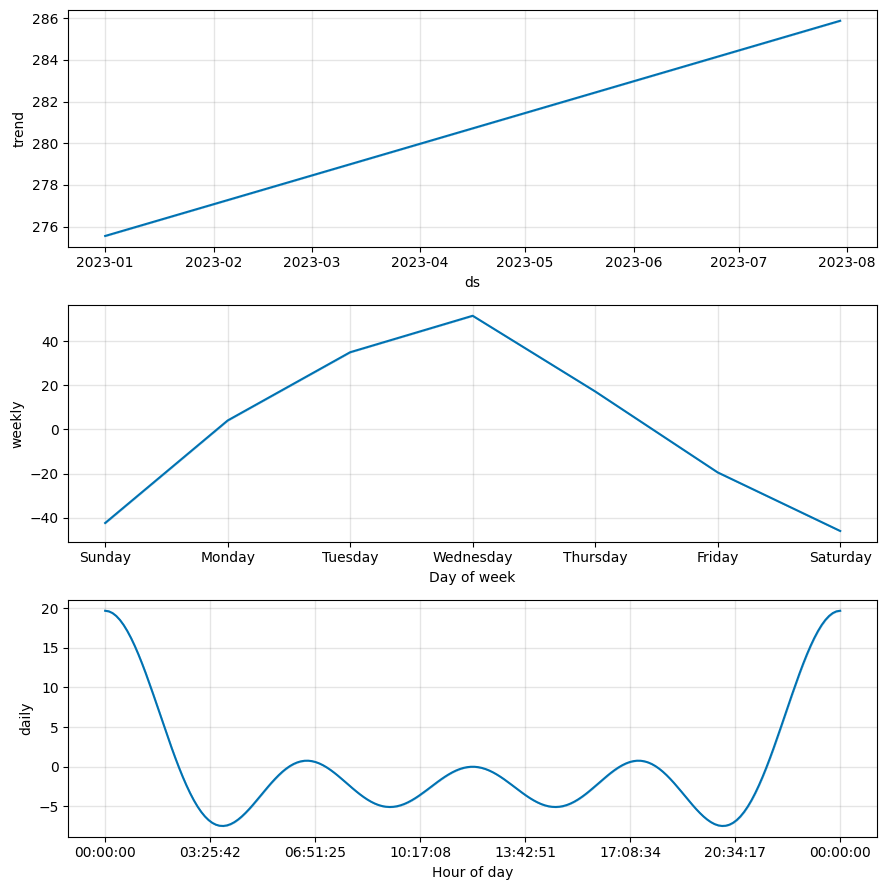

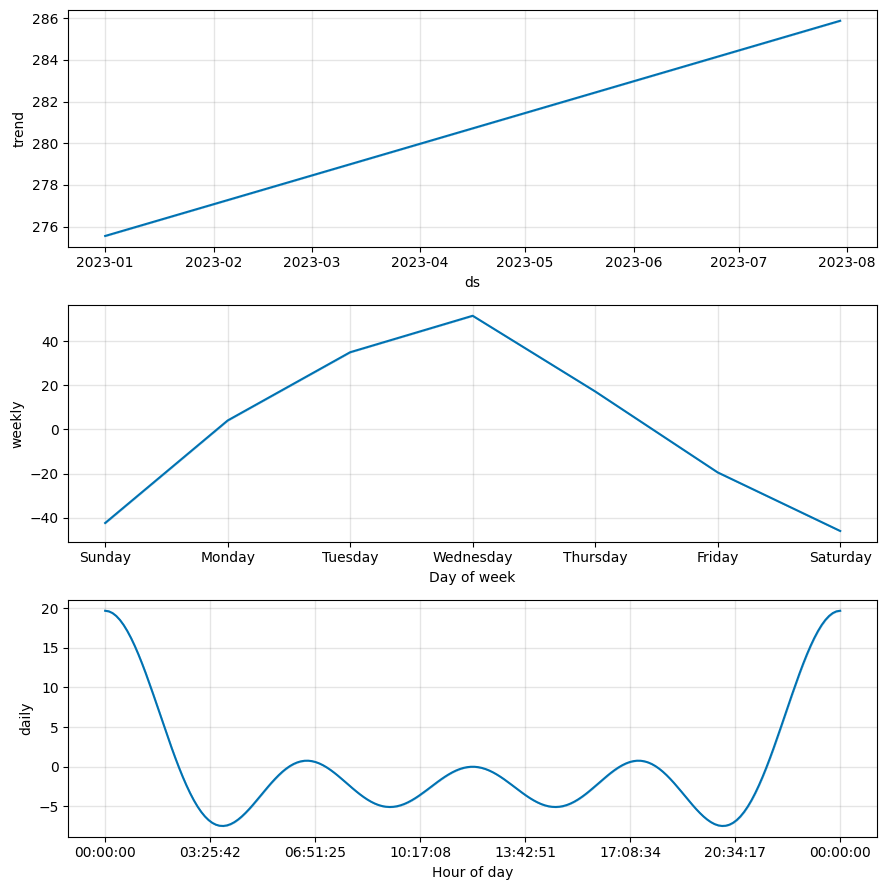

In [6]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

dates = pd.date_range(start='2023-01-01', end='2023-06-30')

np.random.seed(42)
sales = 300 + 50 * np.sin(2 * np.pi * dates.dayofweek / 7) + np.random.normal(0, 20, size=len(dates))

df = pd.DataFrame({'ds': dates, 'y': sales})

model = Prophet(daily_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title("30-Day Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

model.plot_components(forecast)